TechnoHacks

Task 1: Image Classification (UsING the CIFAR-10 dataset to build a model that can classify images into 10 different categories)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

#Load the CIFAR-10 dataset

In [ ]:
 (train_images, train_labels), (test_images, test_labels) =cifar10.load_data();

170498071/170498071 [==============================] - 11s 0us/step


# Normalize pixel values to be between 0 and 1

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

 #Visualize random images before training

In [ ]:

plt.figure(figsize=(10, 3))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = np.random.randint(0, len(train_images))
    plt.imshow(train_images[index])
    plt.xlabel(f"Class: {train_labels[index][0]}")

plt.suptitle("Random Images Before Training")
plt.show()

Define the CNN Model

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#Compile the model

In [ ]:

 model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5821 - accuracy: 0.4180 - val_loss: 1.2936 - val_accuracy: 0.5300
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1969 - accuracy: 0.5754 - val_loss: 1.1100 - val_accuracy: 0.6062
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0502 - accuracy: 0.6293 - val_loss: 1.0440 - val_accuracy: 0.6341
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9575 - accuracy: 0.6645 - val_loss: 0.9483 - val_accuracy: 0.6680
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8840 - accuracy: 0.6915 - val_loss: 0.9382 - val_accuracy: 0.6736
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8261 - accuracy: 0.7096 - val_loss: 0.8949 - val_accuracy: 0.6883
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7816 - accuracy: 0.7255 - val_loss: 0.9070 -

#Visualize training history

Text(0.5, 1.0, 'Training History')

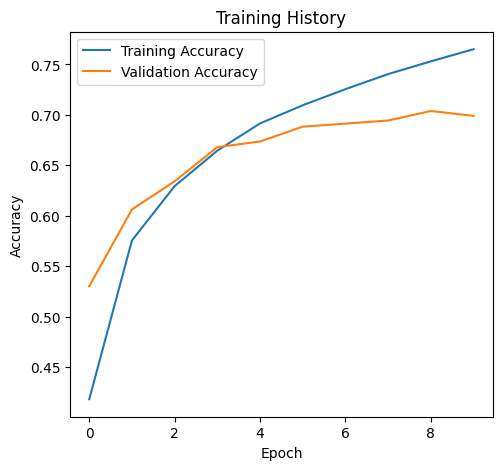

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],
label='Training Accuracy')
plt.plot(history.history['val_accuracy'],
label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training History")

#Visualize random prediction after training prediction

313/313 [==============================] - 7s 24ms/step


<ipython-input-48-cab9c24bddc6>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, i + 1)


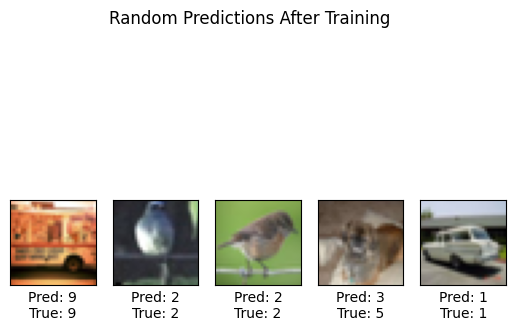

In [ ]:


predictions = model.predict(test_images)

plt.subplot(1, 2, 2)

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = np.random.randint(0, len(test_images))
    plt.imshow(test_images[index])
    predicted_label = np.argmax(predictions[index])
    true_label = test_labels[index][0]
    plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}")

plt.suptitle("Random Predictions After Training")
plt.show()